Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [ ]:
NAME = "Anamarija Hauptman"
COLLABORATORS = ""

In [12]:
import numpy as np
import scipy.ndimage as ndi
import scipy.interpolate as interp
import PIL.Image as Image
import rvlib as rv
import time
import matplotlib.pyplot as plt

---

# Domača naloga 3

Pri vseh nalogah uporabite sliko na naslovu `"./data/slika.JPG"`.

1. Uporabite funkcijo `convolve()` v Python knjižnici `scipy.ndimage` za izračun 2D diskretne konvolucije na sivinski sliki z jedrom `iKernel = numpy.ones([11,11])/121`. Prikažite dobljeno sliko in izpišite čas trajanja izračuna v milisekundah. Trajanje izračunajte z uporabo funkcije `clock()` v knjižnjici `time` in ga nato ustrezno pretvorite.

cas trajanja izpisa: 8.80722 milisekund


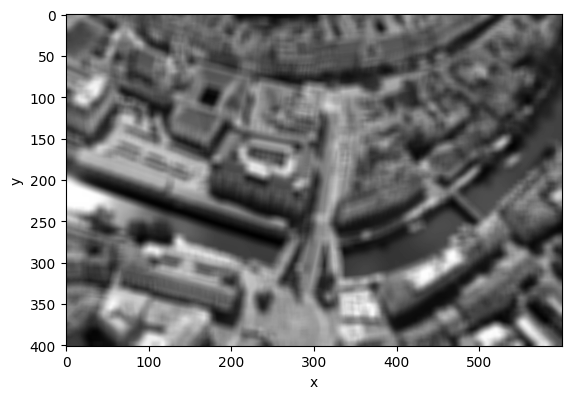

In [44]:
img = rv.loadImage('./data/slika.JPG')
iKernel = np.ones([11, 11]) / 121
gray_img = rv.colorToGray(img)

t1 = time.perf_counter_ns()
convolve_img = ndi.convolve(gray_img, iKernel)
t2 = time.perf_counter_ns()

print('cas trajanja izpisa:', (t2 - t1) / 10e6, 'milisekund')

rv.showImage(convolve_img)

In [45]:
iKernel = np.ones([11, 11]) / 121

2. V funkciji diskretne 2D konvolucije napisani na vajah smo privzeli, da so sivinske vrednosti točk zunaj slike enake 0. Pri uporabi funkcije z večjimi konvolucijskimi jedri zaradi tega na izhodnih slikah dobimo popačen rob. Obstajajo različni načini za odpravo teh popačenj. Opišite in analizirajte vse možne načine, ki jih omogoča funkcija `convolve()` v Python knjižnici `scipy.ndimage` (parameter mode), ter prikažite rezultate. Vizualno ocenite kako se razlikujejo rezultati različnih načinov pri manjših in večjih velikostih jedra za povprečenje (npr. 5 in 21).

In [53]:
img = rv.loadImage('./data/slika.JPG')
iKernel1 = np.ones([5, 5]) / 25
iKernel2 = np.ones([21, 21]) / 441
gray_img = rv.colorToGray(img)

2. 1. Opišite in analizirajte način "reflect" ter prikažite na ta način izračunano sliko

`‘reflect’`: (d c b a | a b c d | d c b a) Zrcaljenje čez rob

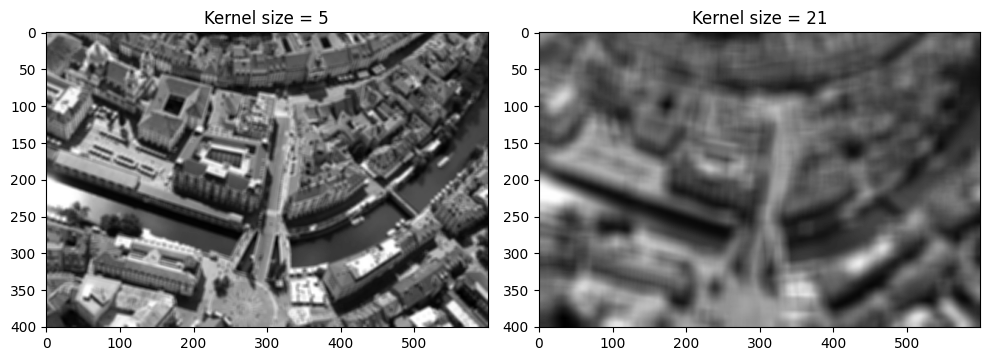

In [62]:
convolve_img1 = ndi.convolve(gray_img, iKernel1, mode='reflect')
convolve_img2 = ndi.convolve(gray_img, iKernel2, mode='reflect')

fig, axs = plt.subplots(1, 2, figsize=(10, 8))
axs[0].set_title('Kernel size = 5')
axs[0].imshow(convolve_img1, cmap='gray')
axs[1].set_title('Kernel size = 21')
axs[1].imshow(convolve_img2, cmap='gray')
plt.tight_layout()
plt.show()

2. 2. Opišite in analizirajte način "constant" ter prikažite na ta način izračunano sliko

`constant`(k k k k | a b c d | k k k k)
Sivinske vrednosti tock izven slike so enake konstanti `cval`. Prednastavljena vrednost je enaka 0.

Default je enak naši implementirani verziji -- rob je popačen.

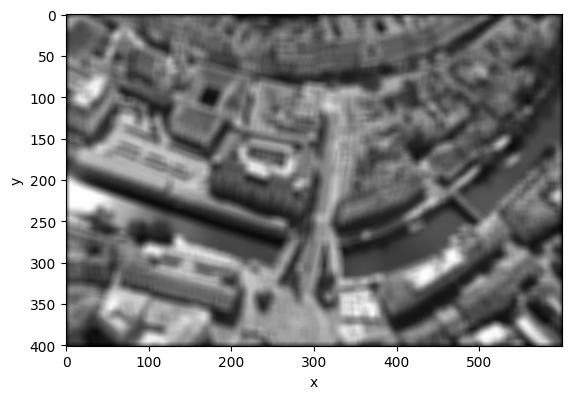

In [48]:
convolve_img = ndi.convolve(gray_img, iKernel, mode='constant', cval=0)
rv.showImage(convolve_img)

2. 3. Opišite in analizirajte način "nearest" ter prikažite na ta način izračunano sliko

`‘nearest’` (a a a a | a b c d | d d d d)
Sivinske vrednosti točk izven slike so enake robnim pikslom.

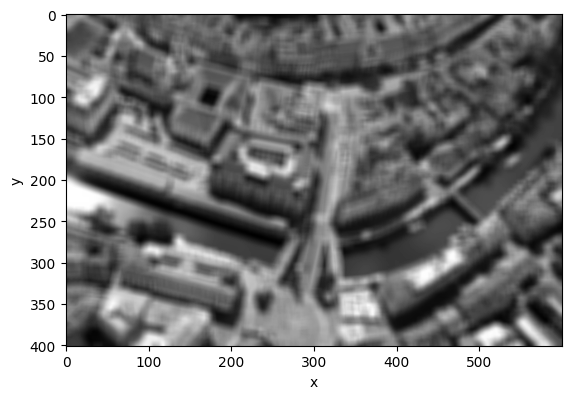

In [49]:
convolve_img = ndi.convolve(gray_img, iKernel, mode='nearest')
rv.showImage(convolve_img)

2. 4. Opišite in analizirajte način "mirror" ter prikažite na ta način izračunano sliko

`‘mirror’` (d c b | a b c d | c b a)
Sivinske vrednosti točk izven slike so zrcaljene čez rob, kjer zadnjipiksel slike predstavlja center.


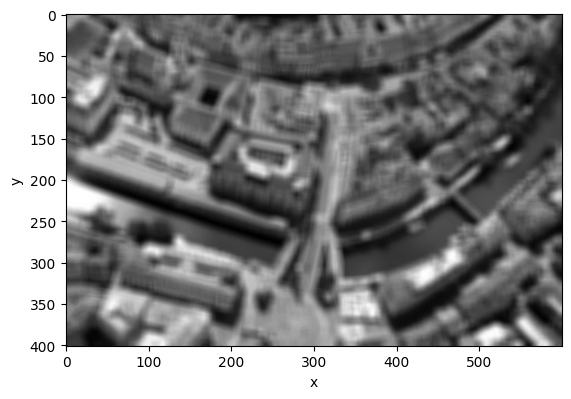

In [50]:
convolve_img = ndi.convolve(gray_img, iKernel, mode='mirror')
rv.showImage(convolve_img)

2. 5. Opišite in analizirajte način "wrap" ter prikažite na ta način izračunano sliko

`‘wrap’` (a b c d | a b c d | a b c d)

The input is extended by wrapping around to the opposite edge.

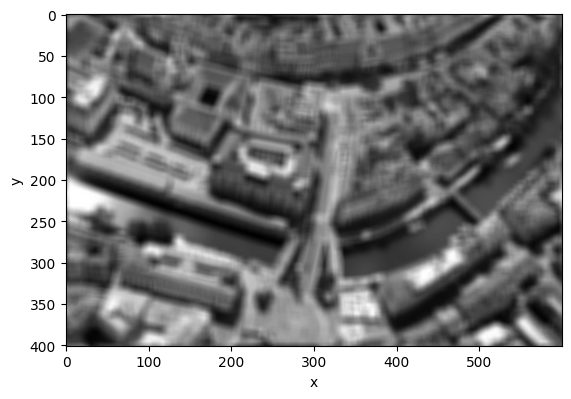

In [51]:
convolve_img = ndi.convolve(gray_img, iKernel, mode='wrap')
rv.showImage(convolve_img)

3. Napišite funkcijo `discreteConvolutionColorImage`, ki bo omogočala konvolucijo barvnih slik s poljubnim jedrom. Preizkusite delovanje na barvni sliki z jedrom `iKernel = numpy.ones([11,11])/121` in prikažite sliko.

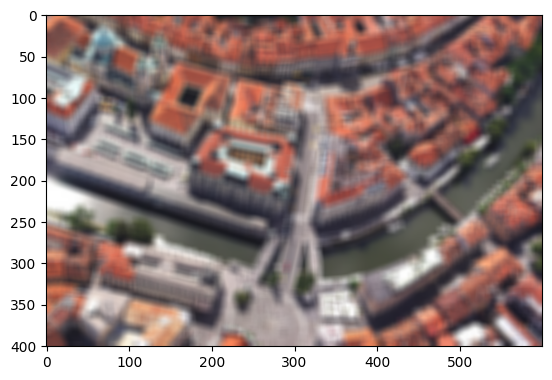

In [72]:
# Implementirajte funkcijo
def discreteConvolutionColorImage(iImage, iKernel, iMode = 'mirror'):
    #Your code here
    oImage = np.zeros_like(iImage)        
    for i in range(iImage.shape[0]):
        oImage[i] = ndi.convolve(iImage[i], iKernel, mode=iMode)
    return oImage
img = rv.loadImage('./data/slika.JPG')
iKernel = np.ones([11,11]) / 121
img_cc = discreteConvolutionColorImage(img, iKernel)
plt.figure()
if img_cc.ndim == 3 and img_cc.shape[0] == 3:
    img_cc = np.transpose(img_cc,[1,2,0])
plt.imshow(img_cc)
plt.show()

In [74]:
from nose.tools import assert_equal, assert_almost_equal
test_image = np.zeros((100, 100, 3), dtype='uint8')
test_image[46:49, 46:49, 1] = 255
test_image[46:49, 46:49, 0] = 25
test_kernel = np.ones((3, 3)) / 9
result = discreteConvolutionColorImage(test_image, test_kernel)

expected_result = np.zeros_like(test_image)
expected_result[45:50, 45:50, 0] = np.array(
    [[2,  5,  8,  5, 2],
     [5, 11, 16, 11, 5],
     [8, 16, 25, 16, 8],
     [5, 11, 16, 11, 5],
     [2,  5,  8,  5, 2]])
expected_result[45:50, 45:50, 1] = np.array(
    [[28,  56,  85,  56,  28],
     [56, 113, 170, 113,  56],
     [85, 170, 255, 170,  85],
     [56, 113, 170, 113,  56],
     [28,  56,  85,  56,  28]])
assert_equal(np.sum(result - expected_result), 0)

AssertionError: 10417 != 0

In [ ]:
# Prikažite sliko


4. 1. Napišite funkcijo za izračun konvolucijskega jedra v obliki 2D simetrične Gaussove funkcije:
```python
    def discreteGaussian2D( iSigma ):
        return oKernel
```
 kjer je `iSigma` standardna deviacija $\sigma$ v 2D simetrični Gaussovi funkciji, ki je definirana kot: 
   $k(u, v) = (2\pi)^{-1}\sigma^{-2}e^{-(u^2 + v^2)/{2\sigma^2}}$ Velikost konvolucijskega jedra $U \times V$ nastavite glede na vrednost `iSigma` kot $U, V = 2 \cdot (3 \sigma) + 1$, kjer tako pridobljene vrednosti $U$ in $V$ zaokrožite s funkcijo `numpy.ceil`, vrednost $k(0, 0)$ pa naj bo v središčnem elementu izhodne 2D matrike `oKernel`. Zagotovite, da bo vsota vseh elementov `oKernel` enaka 1. 

In [11]:
# Implementirajte funkcijo za izračun konvolucijskega jedra
def discreteGaussian2D(iSigma):    
    #Your code here
    U = int(np.ceil(6 * iSigma + 1))
    V = U
    oKernel = np.zeros((U, V))
    return oKernel 

print(discreteGaussian2D(0.1))

[[0. 0.]
 [0. 0.]]


In [ ]:
from nose.tools import assert_equal, assert_almost_equal
k1 = discreteGaussian2D(1)
k3 = discreteGaussian2D(3)
assert_equal(k1.shape, (7, 7))
assert_equal(k3.shape, (19, 19))
assert_almost_equal(np.sum(k1), 1, places=3)
assert_almost_equal(np.sum(k3), 1, places=3)
assert_almost_equal(k1[3, 3], 0.1592, places=3)
assert_almost_equal(k3[9, 9], 0.017735, places=3)

4. 2. Določite konvolucijski jedri za $\sigma = 0.1$ in $3$. Z jedroma izvedite diskretno 2D konvolucijo na barvni sliki in ju prikažite. Obrazložite vpliv vrednosti $\sigma$.

Za majhno vrednost $\sigma$ (npr. $\sigma = 0.1$) je vpliv glajenja majhen, saj je utež elementa $(0,0)$ skoraj 1. Večja kot je vrednost $\sigma$, večja je torej disperzija in večje so pripisane uteži okoliškim elementom $(u,v), u,v\neq 0$. Ker sta tudi vrednosti $U$ in $V$ linearno odvisni od vrednosti $\sigma$ bo večja tudi velikost filtra. 

5. Ostrenje slike je analogno prostorskemu odvajanju sivinskih vrednosti. Ostrenje slik z drugim odvodom izvedemo z uporabo Laplaceovega jedra tako, da vhodni sliki $g(x, y)$ odštejemo uteženo sliko drugega odvoda slike: 
 
 $$f(x, y) = g(x, y) - c \Delta g(x, y)$$

 kjer konstanta $c$ določa stopnjo ostrenja. 
 1. Implementirajte funkcijo, ki izostri sivinsko sliko. Poskrbite da, po odštevanju oz. prištevanju slike drugega odvoda $g(x, y)$ zagotovite, da bodo vrednosti 8-bitne sivinske slike na območju od $[0, 255]$, pri čemer vrednosti manjše od 0 oz. vrednosti večje od 255 ustrezno zaokrožite. 
 2. Izostrite sivinsko sliko z vrednostmi $c = 0, 0.5, 1, 2$ in slike prikažite. Preizkusite različne vrednosti $c$ in obrazložite njihov vpliv na rezultirajočo sivinsko sliko. Če vam čas dopušča preizkusite ostrenje še na barvni sliki.

<img src="./images/RV_4_SLO_LaplaceJedro.png" alt="Laplace" width="150"/>

In [ ]:
# 5. A. Implementirajte funkcijo za ostrenje sivinskih slik
def sharpenImage2D(iImage, c):

    
    return oImage.astype('uint8')

In [ ]:
def sharpenImageColor(iImage, c):

    return oImage



5. 3. Opišite vpliv faktorja $c$ na izostreno sliko:

Pocečevanje vrednosti nekoliko poudari robove. Homogeni deli sivinske slike ostanejo pribljižno enaki. Izjemno se poveča število nasičenih pikslov (šum sol/poper): z naraščanjem vrednosti c postane problem še bolj izrazit.

6. Napišite funkcijo `interpolateColorImage`, ki bo omogočala uporabo interpolacije ničtega (`method='nearest'`) in prvega (`method='linear'`) reda na barvnih slikah. Uporabite funkcijo `interpn()` iz knjižnice `scipy.interpolate`. Preizkusite delovanje funkcije tako, da z ničtim in prvim redom prevzorčite del barvne slike od točke $(50, 100)$ do točke $(200, 250)$ s petkrat bolj gosto mrežo točk. Prikažite originalni del slike in prevzorčeno sliko.

In [ ]:
# Implementirajte funkcijo za interpolacijo barvne slike
def interpolateColorImage( iImage, iCoorX, iCoorY, method = 'linear'):
    #Your code here
   

    return oImage

In [ ]:
from nose.tools import assert_equal, assert_almost_equal
test_image = np.zeros((100, 100, 3), dtype='uint8')
test_image[40:50, 40:50, 0] = 100
iCoorX, iCoorY = np.meshgrid(np.arange(40, 49, 1/5), np.arange(40, 49, 1/5), indexing='xy')
result = interpolateColorImage(test_image, iCoorX, iCoorY, 'nearest')
assert_equal(result.shape, (45, 45, 3))
assert(np.all(result[:, :, 0] == 100))
assert(np.all(result[:, :, 1] == 0))
assert(np.all(result[:, :, 2] == 0))
result = interpolateColorImage(test_image, iCoorX, iCoorY, 'linear')
assert_equal(result.shape, (45, 45, 3))
assert(np.all(result[:, :, 0] == 100))
assert(np.all(result[:, :, 1] == 0))
assert(np.all(result[:, :, 2] == 0))

7. Prilagodite funkcijo za piramidno decimacijo tako, da bo omogočala decimiranje barvnih slik in preizkusite delovanje na barvni sliki. Pomanjšajte sliko za 2-krat in 4-krat.

In [ ]:
def decimateColorImage( iImage, iLevel, iKernel = np.array([[1/16,1/8, 1/16],[1/8, 1/4, 1/8],[1/16, 1/8, 1/16]])):
    #Your code here
    
    return oImage